In [11]:
import numpy as np

# Fermi energy
efermi = 7.601 

# Load data
data = np.loadtxt('elektro.bands.gnu')
k = data[:, 0]
E = data[:, 1] - efermi  # shift energi relatif terhadap Fermi

# Cari VBM dan CBM
valence_band = E[E <= 0]
conduction_band = E[E > 0]

vbm = np.max(valence_band)
cbm = np.min(conduction_band)

# Ambil posisi k-point-nya
vbm_k = k[np.where(E == vbm)[0]]
cbm_k = k[np.where(E == cbm)[0]]

# Cetak hasil
print(f"VBM = {vbm:.4f} eV at k = {vbm_k}")
print(f"CBM = {cbm:.4f} eV at k = {cbm_k}")
print(f"Band Gap = {cbm - vbm:.4f} eV")


VBM = -0.0988 eV at k = [1.5303]
CBM = 3.0086 eV at k = [0.     1.7071]
Band Gap = 3.1074 eV


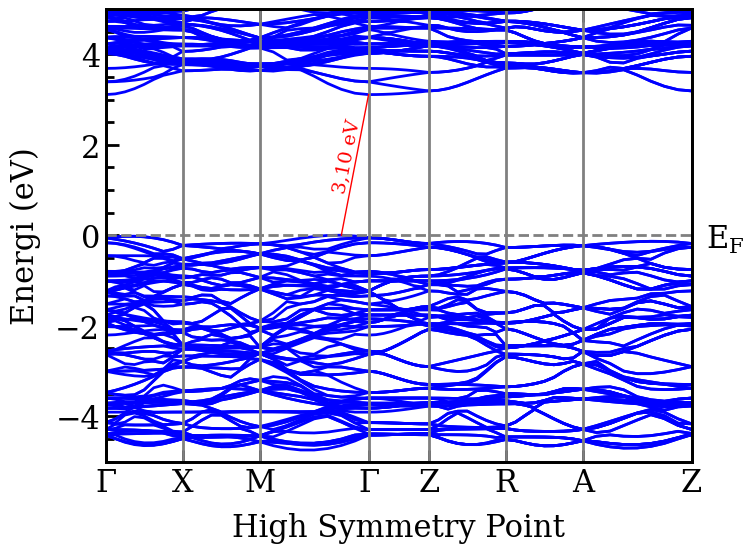

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('../../matplotlib/sci.mplstyle')

# Energi Fermi
shift = 7.501
efermi = 7.501 

# Load data band
data = np.loadtxt('elektro.bands.gnu')
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

# Titik-titik high-symmetry
gG1 = k[0]; X1 = k[8]; M1 = k[16]; gG2 = k[24]
Z1 = k[32]; R1 = k[40]; A1 = k[48]; Z2 = k[56]

# Setup figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot semua band (di-shift oleh Ef)
for band in bands:
    ax.plot(k, band - shift, c='b')

# Garis Fermi dan garis vertikal di high-symmetry points
ax.axhline(efermi-shift, c='gray', ls='--', label=r'$E_F$')
for x in [X1, M1, gG2, Z1, R1, A1, Z2]:
    ax.axvline(x, c='gray')

# Set batas & label
ax.set_xlim(gG1, Z2)
ax.set_ylim(-5, 5)
ax.set_ylabel('Energi (eV)')
ax.set_xlabel('High Symmetry Point')
ax.set_xticks([gG1, X1, M1, gG2, Z1, R1, A1, Z2])
ax.set_xticklabels([r'$\Gamma$', 'X', 'M', r'$\Gamma$', 'Z', 'R', 'A', 'Z'])

# Nonaktifkan minor ticks sumbu x
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

# Tambahkan sumbu-y kanan HANYA untuk menunjukkan Ef
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks([efermi-shift])
ax_right.set_yticklabels([f'$E_F$'])
ax_right.tick_params(axis='y', direction='in', length=0, pad=10)

# Tambahkan garis merah antar titik
x1, y1 = 1.5303, 0.0012 
x2, y2 = gG2, 3.1086
ax.plot([x1, x2], [y1, y2], 'r-', linewidth=1)

# Hitung sudut teks
transform = ax.transData.transform
x1_disp, y1_disp = transform((x1, y1))
x2_disp, y2_disp = transform((x2, y2))
angle = np.degrees(np.arctan2(y2_disp - y1_disp, x2_disp - x1_disp))

# Tambahkan label ke garis merah
x_text = (x1 + x2) / 2 - 0.05
y_text = ((y1 + y2) / 2) + 0.2
ax.text(x_text, y_text, '3,10 eV',
        fontsize=14, color='red',
        rotation=angle, rotation_mode='anchor',
        ha='center', va='center')

plt.tight_layout()
plt.savefig('plot-bands.jpg')
plt.show()


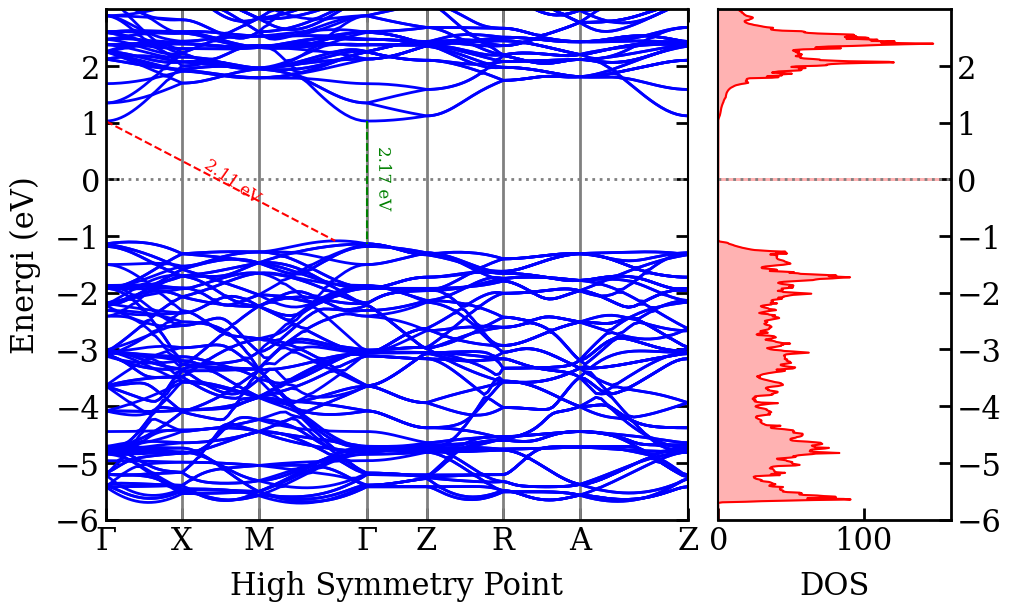

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('../../matplotlib/sci.mplstyle')

# Fermi energy
efermi = 8.024  

# Load band structure data
data = np.loadtxt('elektro.bands.gnu')
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

# Load DOS data
ener, dos, idos = np.loadtxt('elektro.dos', unpack=True)

# Define high-symmetry points
gG1 = k[0]; X1 = k[20]; M1 = k[40]; gG2 = k[60];
Z1 = k[80]; R1 = k[100]; A1 = k[120];  Z2 = k[140]; 
X2 = k[150];  R2 = k[170];  M2 = k[180];  A2 = k[200];  

# Create figure with two subplots, ensuring DOS connects smoothly
fig, axes = plt.subplots(1, 2, figsize=(10, 6), 
                         gridspec_kw={'width_ratios': [2.5, 1], 'wspace': 0.02})  

# --- Plot Band Structure on Left ---
axes[0].axhline(0, c='gray', ls=':')  # Fermi level
high_symmetry_points = [X1, M1, gG2, Z1, R1, A1, Z2, X2, R2, M2]
for point in high_symmetry_points:
    axes[0].axvline(point, c='gray')

# Plot bands
for band in range(len(bands)):
    axes[0].plot(k, bands[band, :] - efermi, c='b')

# Format band structure plot
#axes[0].set_xlabel('Wave Vector')
axes[0].set_ylabel('Energi (eV)')
axes[0].set_xlabel('High Symmetry Point')
axes[0].set_xlim(gG1, Z2)
axes[0].set_ylim(-6, 3)  # **Set rentang energi dari -6 sampai 6 eV**
axes[0].set_xticks([gG1, X1, M1, gG2, Z1, R1, A1, Z2])
axes[0].set_xticklabels([r'$\Gamma$', 'X', 'M', r'$\Gamma$', 'Z', 'R', 'A', 'Z'])
axes[0].set_yticks(np.arange(-6, 3, 1))  # Set tick energi dalam kelipatan 2 eV

# --- Plot DOS on Right ---
axes[1].plot(dos, ener - efermi, c='r', lw=1.5)  # **Pastikan sejajar dengan sumbu energi band structure**
axes[1].axhline(0, c='gray', ls=':')  # Fermi level
axes[1].fill_between( dos, ener - efermi, 0, color='r', alpha=0.3)

# Format DOS plot
axes[1].set_xlabel('DOS')
axes[1].set_xlim(0, 160)  # Extend DOS sedikit
axes[1].set_ylim(-6, 3)  # **Set rentang energi dari -6 sampai 6 eV**

# Tampilkan sumbu y dan x pada grafik DOS
axes[1].yaxis.set_ticks_position('right')
axes[1].yaxis.set_label_position('right')
axes[1].set_xlabel('DOS')
axes[1].set_yticks(np.arange(-6, 3, 1))

axes[1].tick_params(axis='y', labelright=True)  # Aktifkan label di kanan
axes[1].tick_params(axis='x', labelbottom=True)  # Aktifkan label x bawah

# Buat agar sumbu y tidak tumpang tindih
axes[0].tick_params(axis='y', labelright=False)

# **Hubungkan DOS ke band structure secara visual**
axes[0].spines['right'].set_linewidth(1.5)  # Buat batas lebih tegas
axes[1].spines['left'].set_linewidth(1.5)

# **Gabungkan kedua plot secara seamless**
axes[1].spines['left'].set_color('black')  # Buat batas DOS sama dengan band structure
axes[0].spines['right'].set_color('black')

# Menghilangkan border antar subplot supaya benar-benar menyatu
#axes[1].yaxis.set_visible(False)  # Hilangkan sumbu y di DOS agar tampak menempel
axes[1].tick_params(axis='both', which='minor', length=0)
axes[1].tick_params(top=False, which='both')
axes[0].tick_params(axis='both', which='minor', length=0)  # Hapus tick marks di plot band structure
x1 = 1.5303; x2 = 1.5;
y1 = 1.029; y2 = -1.084;
y3 = 1.03; y4 = -1.14;
axes[0].plot([gG1, x2], [y1, y2], 'r--', linewidth=1.5)  # indirect
axes[0].plot([gG2, gG2 ], [y3, y4], 'g--', linewidth=1.5)  # direct
# Hitung sudut kemiringan dalam derajat
angle = np.degrees(np.arctan((-0.7)))

# Tambahkan label dengan rotasi mengikuti kemiringan garis bandgap
axes[0].annotate(f"2.11 eV",
                 xy=(X1+0.15, 0.3),  # Posisi di tengah garis bandgap
                 fontsize=12, color='r', verticalalignment='center',
                 rotation=angle, rotation_mode='anchor') 

# Hitung sudut kemiringan dalam derajat
angle2 = np.degrees(np.arctan((-150)))

# Tambahkan label dengan rotasi mengikuti kemiringan garis bandgap
axes[0].annotate(f"2.17 eV",
                 xy=(gG2+0.1, 0.6),  # Posisi di tengah garis bandgap
                 fontsize=12, color='g', verticalalignment='center',
                 rotation=angle2, rotation_mode='anchor')

# Adjust layout and save
fig.set_constrained_layout(True)
plt.savefig('bands-dos.jpg', bbox_inches='tight')
plt.show()
